In [30]:
# Проверка работоспособности системы
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
print(tf.__version__)

# Проверка подключения графического процессора
print("Доступные устройства GPU:")
for device in tf.config.experimental.list_physical_devices('CPU'):
    print(device)

os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

2.15.0
Доступные устройства GPU:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [31]:
# Создание датасета для обучения

# Функции загрузки и предобработки к каждому элементу датасета
def load_and_preprocess_train_image(image_path, label):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_png(img, channels=1)  # Черно-белые изображения
        img = tf.image.resize(img, [128, 128])
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img, label



# Функция, которая создает датасет из папки с изображениями
def import_train_data(image_dir):
    # Получение списка файлов с изображениями
    image_files = []
    for papka in os.listdir(image_dir):
        papka_dir = os.path.join(image_dir, papka)
        if os.path.isdir(papka_dir):
            for file in os.listdir(papka_dir):
                if file.endswith('.png'):
                    image_files.append(os.path.join(papka_dir, file))

   
    print("Количество изображений:",len(image_files))
   
    # Создание списка меток 
    labels = []
    dict_labels = dict()
    for i in range(0, len(image_files)):
         # Создание индекса графика
        #label = tuple(((image_files[i].split('.png')[0]).split("\\")[1]).split('_'))
        label = tuple(image_files[i].split("\\"))
        labels.append(i)
        dict_labels[label] = i

    print(dict_labels)
    print("Количество меток:",len(set(labels)))
    print("Распределение меток:",labels)

    # Создание датасета с использованием tf.data.Dataset.from_tensor_slices
    dataset = tf.data.Dataset.from_tensor_slices((image_files, labels))
    # Применение функции загрузки и предобработки к каждому элементу датасета
    dataset = dataset.map(load_and_preprocess_train_image)
    
    return dataset, dict_labels, len(dict_labels)

In [32]:
# Путь к папке с изображениями для обучения
train_image_dir = 'dataset_№1/train/'


train_dataset, train_kodificator, output_classes = import_train_data(train_image_dir)

batch_size = 1  # Количество изображений подаваемых нейросети за одну итерацию обучения
train_dataset = train_dataset.batch(batch_size)
print("Кодификатор:", train_kodificator)
print("Длина кодификатора:", len(train_kodificator))
print("Количество классов: ", output_classes)

Количество изображений: 45
{('dataset_№1/train/test1', 'test1_0.png'): 0, ('dataset_№1/train/test1', 'test1_1.png'): 1, ('dataset_№1/train/test1', 'test1_10.png'): 2, ('dataset_№1/train/test1', 'test1_2.png'): 3, ('dataset_№1/train/test1', 'test1_3.png'): 4, ('dataset_№1/train/test1', 'test1_4.png'): 5, ('dataset_№1/train/test1', 'test1_5.png'): 6, ('dataset_№1/train/test1', 'test1_6.png'): 7, ('dataset_№1/train/test1', 'test1_7.png'): 8, ('dataset_№1/train/test1', 'test1_8.png'): 9, ('dataset_№1/train/test1', 'test1_9.png'): 10, ('dataset_№1/train/test2', 'test2_0.png'): 11, ('dataset_№1/train/test2', 'test2_1.png'): 12, ('dataset_№1/train/test2', 'test2_10.png'): 13, ('dataset_№1/train/test2', 'test2_2.png'): 14, ('dataset_№1/train/test2', 'test2_3.png'): 15, ('dataset_№1/train/test2', 'test2_4.png'): 16, ('dataset_№1/train/test2', 'test2_5.png'): 17, ('dataset_№1/train/test2', 'test2_6.png'): 18, ('dataset_№1/train/test2', 'test2_7.png'): 19, ('dataset_№1/train/test2', 'test2_8.png'

In [33]:
# Создание модели
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 1)))

# Пулинг для уменьшения размера
model.add(MaxPooling2D(pool_size=(4, 4)))

# Второй сверточный слой
model.add(Conv2D(64, (2, 2), activation='relu'))

# Пулинг для уменьшения размера
model.add(MaxPooling2D(pool_size=(2, 2)))

# Спец. слой, который переводит матрицу в вектор
model.add(Flatten())

# Полносвязный слой
model.add(Dense(150, activation='relu'))

# Выходной слой с нейронами (по одному для каждого класса) и softmax активацией
model.add(Dense(output_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 32)      544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 150)             

In [43]:
history = model.fit(train_dataset, epochs=3, validation_data=train_dataset)

Epoch 1/3
45/45 [==============================] - 1s 25ms/step - loss: 0.7179 - accuracy: 0.8889 - val_loss: 0.4099 - val_accuracy: 0.9556
Epoch 2/3
45/45 [==============================] - 1s 24ms/step - loss: 0.2381 - accuracy: 0.9556 - val_loss: 0.0772 - val_accuracy: 1.0000
Epoch 3/3
45/45 [==============================] - 1s 25ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000


In [44]:
test_loss, test_accuracy = model.evaluate(train_dataset)
print ('Точность нейросети:', test_accuracy*100)

45/45 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Точность нейросети: 100.0


In [79]:
# ПРЕДСКАЗАНИЕ СЕТИ
import matplotlib.image as mpimg

def load_and_preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=1)  # Черно-белые изображения
    img = tf.image.resize(img, [128, 128])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.expand_dims(img, axis=0)  # Создание батча из одного изображения
    return img

def SwapDict(dict):
        return {v: k for k, v in dict.items()}

def show_my_img(path, title):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Отключение осей координат
    plt.show()

def predict_image(img_path):

    # Пример пути к новому изображению
    img = load_and_preprocess_image(img_path)


    # Получение предсказания
    predictions = model.predict(img)

    # Определение класса с наибольшей вероятностью
    predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
    print('Predicted class:', predicted_class)

    train_kodificator_swap = SwapDict(train_kodificator)
    print("Predicted img: ", train_kodificator_swap[predicted_class])
    print(train_kodificator_swap[predicted_class][0] + '/' + train_kodificator_swap[predicted_class][1])
    show_my_img(train_kodificator_swap[predicted_class][0] + '/' + train_kodificator_swap[predicted_class][1], "Предсказание сети")


1/1 [==============================] - 0s 34ms/step
Predicted class: 39
Predicted img:  ('dataset_№1/train/test5', 'test5_4.png')
dataset_№1/train/test5/test5_4.png


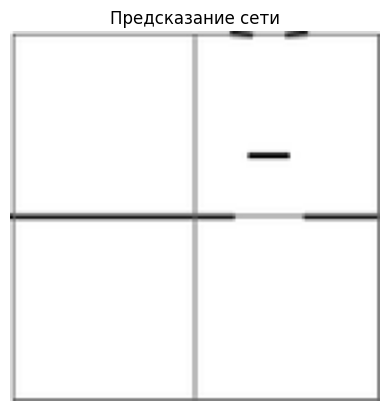

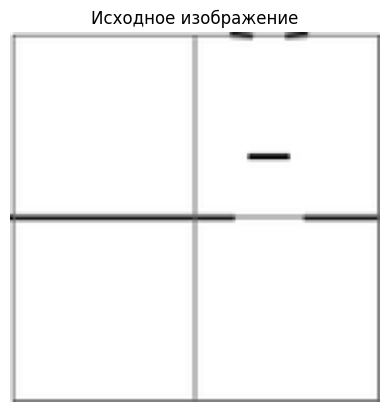

In [81]:
img_path = 'dataset_№1/train/test5/test5_4.png'
predict_image(img_path)
show_my_img(img_path, "Исходное изображение")